C:\Users\idine\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


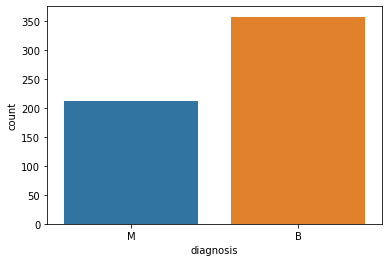

In [1]:
import pandas as pd
import seaborn as sb
from sklearn.preprocessing import *
import numpy as np
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
from collections import Counter

df=pd.read_csv('data.csv')
fig = Figure(figsize = (4, 4))
x0=sb.countplot(df['diagnosis'],label='count')
fig = x0.get_figure()   
df.isna().sum() 
df=df.dropna(axis=1)


In [3]:
labelencoder_Y= LabelEncoder()
df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[:,1].values)
df.iloc[:,1]
X=df.iloc[:,2:31].values
Y=df.iloc[:,1].values

class LogisticRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

def trainData_testData_split(X, y, testPercentage, seed=1121):
    np.random.seed(seed)
    randomArray = np.random.rand(X.shape[0])
    splittedData = randomArray < np.percentile(randomArray, int((1 - testPercentage)*100))

    X_train = X[splittedData]
    y_train = y[splittedData]
    X_test  = X[~splittedData]
    y_test  = y[~splittedData]
    
    return X_train, X_test, y_train, y_test
#splitting the data the into independent x a nd y data sets
X=df.iloc[:,2:31].values
Y=df.iloc[:,1].values
X_train, X_test, Y_train, Y_test = trainData_testData_split(X, Y,0.25,0)

if __name__ == "__main__":
    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy
   
    
    regressor = LogisticRegression(learning_rate=0.0001, n_iters=1000)
    regressor.fit(X_train, Y_train)
    predictions = regressor.predict(X_test)
    
def get_confusion_matrix(l1, l2):

    assert len(l1)==len(l2), "Two lists have different size."

    K = len(np.unique(l1))

    # create label-index value
    label_index = dict(zip(np.unique(l1), np.arange(K)))

    result = np.zeros((K, K))
    for i in range(len(l1)):
        result [label_index[l1[i]]][label_index[l2[i]]] += 1
    

    return result.astype(int)
x=get_confusion_matrix(Y_test,regressor.predict(X_test))


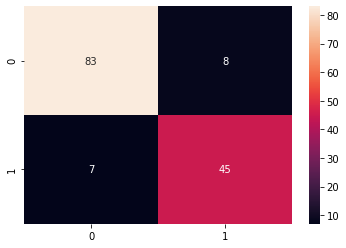

In [4]:
from tkinter import * 
from matplotlib.figure import Figure
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, 
NavigationToolbar2Tk)
  
def plot_1():
    a = Toplevel(window)
    f=pd.read_csv('data.csv')
    
    canvas = FigureCanvasTkAgg(fig,master = a)  
    canvas.draw()
  
    canvas.get_tk_widget().pack()
  
    toolbar = NavigationToolbar2Tk(canvas,a)
    toolbar.update()
    canvas.get_tk_widget().pack()
    
def plot_C_Matrix():
    d = Toplevel(window)
   
    fig_1 = Figure(figsize = (5, 5))
    y=sb.heatmap(x ,annot=True)
    fig_1 = y.get_figure()
       
    canvas_ = FigureCanvasTkAgg(fig_1,
                               master = d)  
    canvas_.draw()
  
    # placing the canvas on the Tkinter window
    canvas_.get_tk_widget().pack()
  
    # creating the Matplotlib toolbar
    toolbar = NavigationToolbar2Tk(canvas_,
                                   d)
    toolbar.update()
  
    # placing the toolbar on the Tkinter window
    canvas_.get_tk_widget().pack()

def heatmap():
    c = Toplevel(window)
    # the figure that will contain the plot
    figure = Figure(figsize = (30,30))
    
    x=df.iloc[:,1:31].corr()
    plt.figure(figsize=(25,25))
    xx=sb.heatmap(x,annot=True)
    figure = xx.get_figure()   
 
    # creating the Tkinter canvas
    # containing the Matplotlib figure
    canvas_ = FigureCanvasTkAgg(figure,
                               master = c)  
    canvas_.draw()
    canvas_.get_tk_widget().pack()
    toolbar = NavigationToolbar2Tk(canvas_,c)
    toolbar.update()
    canvas_.get_tk_widget().pack()

window = Tk()
window.title('LR')
window.geometry("380x550")
bg = PhotoImage(file = "bg1.png")
l = Label(window,image = bg)
l.place(x =0,y=0,width=380,height=550)

plot_button_1 = Button(master = window, command = plot_1, height = 2,  width = 10, text = "Diag_Plot",font=("Times of roman", 9,'bold'),fg='white',bg='#383838')

plot_button_2 = Button(master = window, command = plot_C_Matrix, height = 2, width = 10, text = "C_Matrix",font=("Times of roman", 9,'bold'),fg='white',bg='#383838')


def CLS_Report():
    x=get_confusion_matrix(Y_test,regressor.predict(X_test))
    TP=x[0][0]
    TP=int(TP)
    FP=x[0][1]
    FP=int(FP)
    FN=x[1][0]
    FN=int(FN)
    TN=x[1][1]
    TN=int(TN)
    xax=TP+TN+FN+FP
    Accuracy=(TP+TN)/(TP+TN+FN+FP)
    recall= TP/(TP+FN)  # True positivetity rate
    precision=TP/(TP+FP) #
    f_1= 2*(recall*precision)/(precision+recall)
    True_positivetity_rate= TP/(FN+TP)
    True_Negitive_Rate=TN/(TN+FP)
    False_Positive_rate= FP/(TN+FP)
    false_negitive_rate = FN/(FN+TP)
    mis_rate=(FP+FN)/xax # Error Rate
    Prevalence=TP+FN/xax
    txtfld1.insert(0,Accuracy)
    txtfld2.insert(0,recall)
    txtfld3.insert(0,precision)
    txtfld4.insert(0,f_1)
    txtfld5.insert(0,True_positivetity_rate)
    txtfld6.insert(0,False_Positive_rate)
    txtfld7.insert(0,True_Negitive_Rate)
    txtfld8.insert(0,false_negitive_rate)
    txtfld9.insert(0,mis_rate)
    txtfld10.insert(0,Prevalence)
    
plot_button_3 = Button(master = window, command = heatmap,height = 2, width = 10,text = "HeatMap",font=("Times of roman", 9,'bold'),fg='white',bg='#383838')
btn = Button(master = window, command = CLS_Report,height = 2, width = 10,text = "CLS_Report",font=("Times of roman", 9,'bold'),fg='white',bg='#383838')

txtfld1=Entry(window, text="1", bd=5,font = ('Times of roman',12,'bold'))
txtfld1.place(x=150, y=125,width=200,height=35)
txtfld2=Entry(window, text="2", bd=5,font = ('Times of roman',12,'bold'))
txtfld2.place(x=150, y=160,width=200,height=35)
txtfld3=Entry(window, text="3", bd=5,font = ('Times of roman',12,'bold'))
txtfld3.place(x=150, y=195,width=200,height=35)
txtfld4=Entry(window, text="4", bd=5,font = ('Times of roman',12,'bold'))
txtfld4.place(x=150, y=230,width=200,height=35)

lbl_1=Label(window, text="Accuracy", fg='orange', font=("Castellar", 12,'bold'),bg='#121212')
lbl_1.place(x=15, y=125,width=130,height=35)
lbl_2=Label(window, text="Recall", fg='orange', font=("Castellar", 12,'bold'),bg='#121212')
lbl_2.place(x=15, y=160,width=130,height=35)
lbl_3=Label(window, text="Precision", fg='orange', font=("Castellar", 12,'bold'),bg='#121212')
lbl_3.place(x=15, y=195,width=130,height=35)
lbl_4=Label(window, text="F1 Score", fg='orange', font=("Castellar", 12,'bold'),bg='#121212')
lbl_4.place(x=15, y=230,width=130,height=35)

txtfld5=Entry(window, text="5", bd=5,font = ('Times of roman',12,'bold'))
txtfld5.place(x=150, y=320,width=200,height=35)
txtfld6=Entry(window, text="6", bd=5,font = ('Times of roman',12,'bold'))
txtfld6.place(x=150, y=355,width=200,height=35)
txtfld7=Entry(window, text="7", bd=5,font = ('Times of roman',12,'bold'))
txtfld7.place(x=150, y=390,width=200,height=35)
txtfld8=Entry(window, text="8", bd=5,font = ('Times of roman',12,'bold'))
txtfld8.place(x=150, y=425,width=200,height=35)
txtfld9=Entry(window, text="9", bd=5,font = ('Times of roman',12,'bold'))
txtfld9.place(x=150, y=460,width=200,height=35)
txtfld10=Entry(window, text="10", bd=5,font = ('Times of roman',12,'bold'))
txtfld10.place(x=150, y=495,width=200,height=35)

lbl_5=Label(window, text="TP Rate", fg='orange', font=("Castellar", 12,'bold'),bg='#121212')
lbl_5.place(x=15, y=320,width=130,height=35)
lbl_6=Label(window, text="FP Rate", fg='orange', font=("Castellar", 12,'bold'),bg='#121212')
lbl_6.place(x=15, y=355,width=130,height=35)
lbl_7=Label(window, text="TN Rate", fg='orange', font=("Castellar", 12,'bold'),bg='#121212')
lbl_7.place(x=15, y=390,width=130,height=35)
lbl_8=Label(window, text="FN Rate", fg='orange', font=("Castellar", 12,'bold'),bg='#121212')
lbl_8.place(x=15, y=425,width=130,height=35)
lbl_9=Label(window, text="MIS_CLS Rate", fg='orange', font=("Castellar", 12,'bold'),bg='#121212')
lbl_9.place(x=10, y=460,width=135,height=35)
lbl_10=Label(window, text="Prevalence", fg='orange', font=("Castellar", 12,'bold'),bg='#121212')
lbl_10.place(x=10, y=495,width=135,height=35)

lbl1=Label(window, text="Logistic Regression", fg='skyblue', font=("Castellar", 16,'bold'),bg='#121212')
lbl1.place(x=40, y=80,width=285,height=30)
lbl2=Label(window, text="Area Under Curve", fg='skyblue', font=("Castellar", 14,'bold'),bg='#121212')
lbl2.place(x=50, y=280,width=270,height=30)

lbl=Label(window,bg='#F5EEDC')
lbl.place(x=0, y=60,width=380,height=5)

# place the button 
# in main window
plot_button_1.place(x=15,y=10)
plot_button_2.place(x=105,y=10)
plot_button_3.place(x=195,y=10)
btn.place(x=285,y=10)
# run the gui
window.mainloop()